# Sentiment Analysis with Reviews Scraped from Hello Tractor Application From Google Play   

In [5]:
# pip install google-play-scraper

Note: you may need to restart the kernel to use updated packages.


In [6]:
#Importing necessary libraries

import pandas as pd
import numpy as np
from google_play_scraper import app, Sort, reviews_all
import plotly.express as px

#### Scraping Play store for Hello Tractor Reviews

In [7]:
# Reviews_all Scrape the reviewid, username, content etc from the app page into a JSON format
hello_tractor = reviews_all('com.hellotractor.android.code',sleep_milliseconds=0, lang='en', country='NG', sort=Sort.NEWEST)

In [8]:
hello_tractor

[{'reviewId': 'd28fdd72-c71d-40c3-9215-f9b27a61195e',
  'userName': 'ኢትዬ TUBE',
  'userImage': 'https://play-lh.googleusercontent.com/a-/ALV-UjUWjaEXrpnCs5kARvEVUVVph6GeGM8CyFFHQ92l1uhNwEipXKZ8SQ',
  'content': 'It is the best that can give a good experience in the field of agriculture and is prepared in a different form than the usual Apps',
  'score': 4,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '3.4.34',
  'at': datetime.datetime(2024, 10, 8, 14, 11, 12),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '3.4.34'},
 {'reviewId': '4445210a-c87b-4cbf-a07e-df68b4662ea2',
  'userName': 'Alex Tum',
  'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocLQklb-Q_wNGZmvDfL5G_veCy4vmzMNZxyC5FwHcPolle3LPg=mo',
  'content': 'Excellent',
  'score': 5,
  'thumbsUpCount': 0,
  'reviewCreatedVersion': '3.4.34',
  'at': datetime.datetime(2024, 7, 10, 10, 52, 54),
  'replyContent': None,
  'repliedAt': None,
  'appVersion': '3.4.34'},
 {'reviewId': '34e47cbb-312f-45cd-8418-b9

In [9]:
# convert the json data into a dataframe
hello_tractor_df = pd.json_normalize(hello_tractor)
hello_tractor_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,d28fdd72-c71d-40c3-9215-f9b27a61195e,ኢትዬ TUBE,https://play-lh.googleusercontent.com/a-/ALV-U...,It is the best that can give a good experience...,4,0,3.4.34,2024-10-08 14:11:12,None,None,3.4.34
1,4445210a-c87b-4cbf-a07e-df68b4662ea2,Alex Tum,https://play-lh.googleusercontent.com/a/ACg8oc...,Excellent,5,0,3.4.34,2024-07-10 10:52:54,None,None,3.4.34
2,34e47cbb-312f-45cd-8418-b98f14f05427,HENRY KENDUIWA,https://play-lh.googleusercontent.com/a-/ALV-U...,Great app on farm measurements.,5,0,None,2024-03-31 15:03:53,None,None,None
3,ed61fdf3-1262-44ce-ae4d-c91d7350b996,Komakech Micheal Jackson,https://play-lh.googleusercontent.com/a/ACg8oc...,Hello tractor is a very good modify system whe...,5,1,3.4.6,2023-10-07 19:50:57,None,None,3.4.6
4,b0f771d7-2afc-4948-9cd5-97be3bd9728f,Odida Mike Maxwell,https://play-lh.googleusercontent.com/a/ACg8oc...,"After running an update, I can't now access my...",1,0,3.4.12,2023-08-09 03:03:14,None,None,3.4.12
...,...,...,...,...,...,...,...,...,...,...,...
58,60ddc00e-f9f6-4586-a5f2-c4bb1c8b57b2,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The best program out there for tractor managem...,5,5,1.0.8,2018-02-21 18:14:40,None,None,1.0.8
59,bdf5b975-904d-4c02-a9d8-43339f2b3ce6,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Excellent,5,6,None,2017-10-08 20:29:29,None,None,None
60,e4c4e5a7-d6ff-4cc0-932c-382e797a18bb,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Sign up issues. Tried severally,1,4,1.0.4,2017-09-19 01:16:10,None,None,1.0.4
61,3904849d-608a-41aa-a008-80e44e66c4cc,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Great way to connect tractors to the cloud and...,5,4,1.0.0,2017-01-30 13:38:10,None,None,1.0.0


In [10]:
hello_tractor_df.shape

(63, 11)

### Sentiment Analysis of the Scraped Reviews

In [12]:
hello_tractor_df['content']

0     It is the best that can give a good experience...
1                                             Excellent
2                       Great app on farm measurements.
3     Hello tractor is a very good modify system whe...
4     After running an update, I can't now access my...
                            ...                        
58    The best program out there for tractor managem...
59                                            Excellent
60                      Sign up issues. Tried severally
61    Great way to connect tractors to the cloud and...
62         Connecting tractor owners with thier machine
Name: content, Length: 63, dtype: object

In [13]:
from transformers import pipeline

# Save the model locally
model_name = "siebert/sentiment-roberta-large-english"
save_path = r"C:\Users\DELL\OneDrive - swxmq\Desktop\DSFP Python"  # Directory to save the model

In [14]:
# Load the pipeline and save the model
sentiment_analysis = pipeline("sentiment-analysis", model=model_name)
sentiment_analysis.save_pretrained(save_path)

# Reuse the saved model
sentiment_analysis_reuse = pipeline("sentiment-analysis", model=save_path)

Device set to use cpu
Device set to use cpu


In [15]:
# Test the reused model 
# play with the parameter and see if it works

result = sentiment_analysis_reuse("Hello tractor imporoves my farming productivity")
print(result)

[{'label': 'POSITIVE', 'score': 0.9969539642333984}]


In [16]:
#removing wildcharacter and cleaning the content column by casting to a str
hello_tractor_df['content_new']= hello_tractor_df['content'].astype('str')

In [17]:
hello_tractor_df['result'] =hello_tractor_df['content_new'].apply(lambda x: sentiment_analysis_reuse(x))

In [18]:
hello_tractor_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_new,result
0,d28fdd72-c71d-40c3-9215-f9b27a61195e,ኢትዬ TUBE,https://play-lh.googleusercontent.com/a-/ALV-U...,It is the best that can give a good experience...,4,0,3.4.34,2024-10-08 14:11:12,None,None,3.4.34,It is the best that can give a good experience...,"[{'label': 'POSITIVE', 'score': 0.998924195766..."
1,4445210a-c87b-4cbf-a07e-df68b4662ea2,Alex Tum,https://play-lh.googleusercontent.com/a/ACg8oc...,Excellent,5,0,3.4.34,2024-07-10 10:52:54,None,None,3.4.34,Excellent,"[{'label': 'POSITIVE', 'score': 0.998581051826..."
2,34e47cbb-312f-45cd-8418-b98f14f05427,HENRY KENDUIWA,https://play-lh.googleusercontent.com/a-/ALV-U...,Great app on farm measurements.,5,0,None,2024-03-31 15:03:53,None,None,None,Great app on farm measurements.,"[{'label': 'POSITIVE', 'score': 0.998770654201..."
3,ed61fdf3-1262-44ce-ae4d-c91d7350b996,Komakech Micheal Jackson,https://play-lh.googleusercontent.com/a/ACg8oc...,Hello tractor is a very good modify system whe...,5,1,3.4.6,2023-10-07 19:50:57,None,None,3.4.6,Hello tractor is a very good modify system whe...,"[{'label': 'POSITIVE', 'score': 0.998410344123..."
4,b0f771d7-2afc-4948-9cd5-97be3bd9728f,Odida Mike Maxwell,https://play-lh.googleusercontent.com/a/ACg8oc...,"After running an update, I can't now access my...",1,0,3.4.12,2023-08-09 03:03:14,None,None,3.4.12,"After running an update, I can't now access my...","[{'label': 'NEGATIVE', 'score': 0.999504327774..."


In [19]:
# spliting the result into sentiment and score
hello_tractor_df['sentiment'] = hello_tractor_df['result'].apply(lambda x: (x[0]['label']))
hello_tractor_df['score'] = hello_tractor_df['result'].apply(lambda x: (x[0]['score']))

In [20]:
hello_tractor_df[['content','score','sentiment']]

,content,score,sentiment
0,It is the best that can give a good experience...,0.998924,POSITIVE
1,Excellent,0.998581,POSITIVE
2,Great app on farm measurements.,0.998771,POSITIVE
3,Hello tractor is a very good modify system whe...,0.998410,POSITIVE
4,"After running an update, I can't now access my...",0.999504,NEGATIVE
...,...,...,...
58,The best program out there for tractor managem...,0.998055,POSITIVE
59,Excellent,0.998581,POSITIVE
60,Sign up issues. Tried severally,0.997675,NEGATIVE
61,Great way to connect tractors to the cloud and...,0.998917,POSITIVE


sentiment
POSITIVE    43
NEGATIVE    20
Name: count, dtype: int64


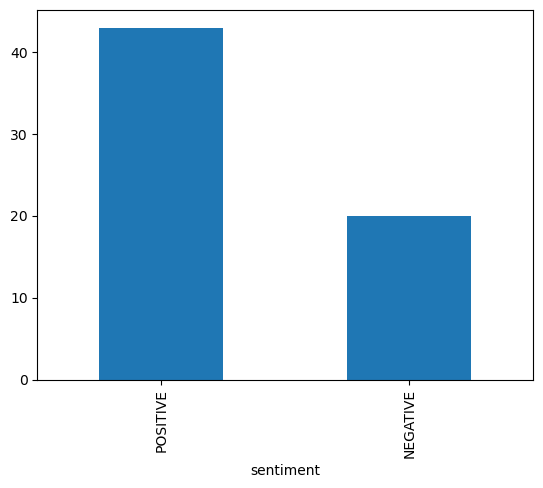

In [102]:
print(hello_tractor_df['sentiment'].value_counts())
hello_tractor_df['sentiment'].value_counts().plot(kind='bar');

It is shown that of the 63 reviews for hello tractor, 43 are positive while 20 are negative reviews 

## Topic Modelling

In [23]:
#generate a series for the reviews
feature_google=hello_tractor_df['content']
print(feature_google.size)
feature_google.head()

63


0    It is the best that can give a good experience...
1                                            Excellent
2                      Great app on farm measurements.
3    Hello tractor is a very good modify system whe...
4    After running an update, I can't now access my...
Name: content, dtype: object

In [24]:
# pip install textblob

In [25]:
# !pip install textblob

#### Translating the non-english reviews to english

In [120]:
# Import the necessary libraries
from textblob import TextBlob


# Define a function to translate the text to English
def translate_to_en(text):
    blob = TextBlob(str(text))
    try:
        return str(blob.translate(to='en'))
    except:
        return str(text)

# Apply the translate_to_en function to the 'review' column of the DataFrame
feature_google = feature_google.apply(translate_to_en)

# Print the top 5 rows of the DataFrame with the new 'review_en' column
print(feature_google.head())


0    best good experience field agriculture prepare...
1                                            excellent
2                          great app farm measurements
3     hello tractor good modify lift small farmer grow
4    running update access bookings app keeps stopp...
Name: content, dtype: object


In [29]:
# !pip install bertopic

In [122]:
from bertopic import BERTopic

topic_model = BERTopic(nr_topics="auto")
topics, probs = topic_model.fit_transform(feature_google.
                                   astype(str))

This line above Uses BERTopic's internal heuristics to determine the number of topics. It tends to generate more topics (e.g., 3 topics) because it doesn’t automatically merge similar topics.

In [124]:
topic_model.get_topic_info().head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10,-1_code_register_come_wher,"[code, register, come, wher, subscription, sub...","[structured easy follow, wher subscription cod..."
1,0,43,0_tractor_app_able_fleet,"[tractor, app, able, fleet, hello, machine, ow...",[hello tractor booking agents helps smallholde...
2,1,10,1_excellent_great_good_okk,"[excellent, great, good, okk, ok, try, hbub, l...","[okk good, excellent, excellent]"


In [112]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Clean the data: remove special characters and stopwords
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text.lower())  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])  # Remove stopwords
    return text

feature_google = feature_google.apply(clean_text)


In [129]:
topic_counts = topic_model.get_topic_info()
print(topic_counts)

   Topic  Count                        Name  \
0     -1     10  -1_code_register_come_wher   
1      0     43    0_tractor_app_able_fleet   
2      1     10  1_excellent_great_good_okk   

                                      Representation  \
0  [code, register, come, wher, subscription, sub...   
1  [tractor, app, able, fleet, hello, machine, ow...   
2  [excellent, great, good, okk, ok, try, hbub, l...   

                                 Representative_Docs  
0  [structured easy follow, wher subscription cod...  
1  [hello tractor booking agents helps smallholde...  
2                   [okk good, excellent, excellent]  


<Axes: title={'center': 'Topic Distribution'}>

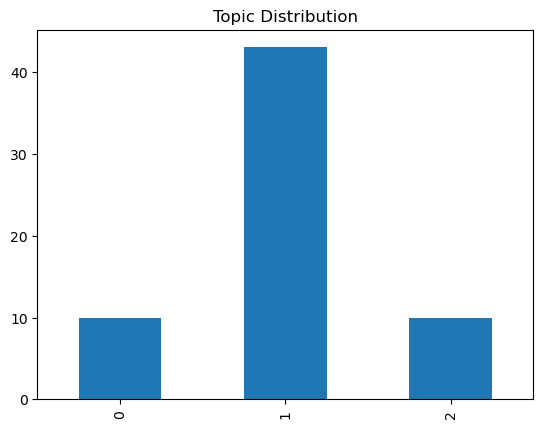

In [131]:
topic_counts = topic_model.get_topic_info()['Count']
topic_counts.plot(kind='bar', title='Topic Distribution')


### Connecting to MySQL and ETL

In [ ]:
##Installing MYSQL Connector Package
!pip install mysql-connector-python

In [43]:
#Renaming my dataframe

dataframe=hello_tractor_df 

In [45]:

data = [tuple(row) for row in hello_tractor_df.to_numpy()]


In [47]:
# Check if any column contains lists
for col in dataframe.columns:
    if dataframe[col].apply(lambda x: isinstance(x, list)).any():
        print(f"Column '{col}' contains list values.")

Column 'result' contains list values.


In [49]:
# Flatten lists into comma-separated strings
for col in dataframe.columns:
    dataframe[col] = dataframe[col].apply(
        lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
    )

In [51]:
# Replace NaN with None
dataframe = dataframe.where(pd.notnull(dataframe), None)

In [55]:
import mysql.connector
import pandas as pd

DB_CONFIG = {
    'host': 'localhost',
    'user': 'root',
    'password': '54254375',#your password
    'database': 'playstore_reviews'
}

def create_connection():
    try:
        conn = mysql.connector.connect(**DB_CONFIG)
        print("Connected to MySQL Database!")
        return conn
    except mysql.connector.Error as err:
        if err.errno == 1049:
            print(f"Database '{DB_CONFIG['database']}' does not exist. Creating it...")
            temp_config = DB_CONFIG.copy()
            temp_config.pop('database')
            conn = mysql.connector.connect(**temp_config)
            cursor = conn.cursor()
            cursor.execute(f"CREATE DATABASE {DB_CONFIG['database']}")
            print(f"Database '{DB_CONFIG['database']}' created successfully!")
            cursor.close()
            conn.close()
            conn = mysql.connector.connect(**DB_CONFIG)
            return conn
        else:
            print(f"Error: {err}")
            return None

def infer_mysql_data_type(dtype, column_name=None):
    if column_name == "reviewId":  # Ensure `reviewId` is always VARCHAR(255)
        return "VARCHAR(255)"
    elif pd.api.types.is_integer_dtype(dtype):
        return "INT"
    elif pd.api.types.is_float_dtype(dtype):
        return "FLOAT"
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return "DATETIME"
    else:
        return "TEXT"

def create_table_from_dataframe(cursor, df, table_name):
    columns_with_types = []
    for col in df.columns:
        dtype = df[col].dtype
        mysql_type = infer_mysql_data_type(dtype, column_name=col)
        columns_with_types.append(f"`{col}` {mysql_type}")

    create_table_query = f"""
    CREATE TABLE IF NOT EXISTS `{table_name}` (
        {", ".join(columns_with_types)},
        PRIMARY KEY (`reviewId`)
    )
    """
    cursor.execute(create_table_query)
    print(f"Table `{table_name}` created successfully!")

def insert_data_from_dataframe(cursor, conn, df, table_name):
    columns = ", ".join([f"`{col}`" for col in df.columns])
    placeholders = ", ".join(["%s"] * len(df.columns))
    insert_query = f"""
    INSERT INTO `{table_name}` ({columns})
    VALUES ({placeholders})
    ON DUPLICATE KEY UPDATE {", ".join([f"`{col}` = VALUES(`{col}`)" for col in df.columns])}
    """
    
    for col in df.columns:
        df[col] = df[col].apply(
            lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x
        )
    df = df.where(pd.notnull(df), None)

    data = [tuple(row) for row in df.to_numpy()]
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"{cursor.rowcount} rows inserted/updated successfully!")

def main():
    conn = create_connection()
    if conn is None:
        print("Failed to connect to the database. Exiting.")
        return

    cursor = conn.cursor()

    global dataframe
    if 'dataframe' not in globals():
        print("DataFrame `dataframe` is not defined. Exiting.")
        return

    datetime_columns = ['at', 'repliedAt']
    for col in datetime_columns:
        if col in dataframe.columns:
            dataframe[col] = pd.to_datetime(dataframe[col], errors='coerce')

    table_name = "playstore_reviews"
    create_table_from_dataframe(cursor, dataframe, table_name)
    insert_data_from_dataframe(cursor, conn, dataframe, table_name)

    cursor.close()
    conn.close()
    print("MySQL connection closed.")

if __name__ == "__main__":
    dataframe = dataframe

    main()


Database 'playstore_reviews' does not exist. Creating it...
Database 'playstore_reviews' created successfully!
Table `playstore_reviews` created successfully!
63 rows inserted/updated successfully!
MySQL connection closed.


In [65]:
df = pd.read_json('hello tractor app reviews.json')

In [69]:
print(sentiment_analysis_reuse('Ahmad is a good boy'))

[{'label': 'POSITIVE', 'score': 0.9985654950141907}]


### Identifying Pros and Cons of Hello Tractor Application

In [73]:
# Separate positive and negative reviews
positive_reviews = hello_tractor_df[hello_tractor_df['sentiment'] == "POSITIVE"]
negative_reviews = hello_tractor_df[hello_tractor_df['sentiment'] == "NEGATIVE"]


In [79]:
# Replace NaN with empty strings and ensure the column with the reviews is of string type
hello_tractor_df['content_new'] = hello_tractor_df['content_new'].fillna("").astype(str)


In [81]:
from sklearn.feature_extraction.text import CountVectorizer

# Define a function to extract frequent terms
def extract_frequent_terms(reviews, column, n=10):
    vectorizer = CountVectorizer(stop_words='english', max_features=n)
    X = vectorizer.fit_transform(reviews[column])  # Use the specified text column
    return vectorizer.get_feature_names_out()

# Extract frequent terms from positive and negative reviews
positive_terms = extract_frequent_terms(positive_reviews, 'content_new')
negative_terms = extract_frequent_terms(negative_reviews, 'content_new')

# Display the results
print("Pros (frequent positive terms):", positive_terms)
print("Cons (frequent negative terms):", negative_terms)


Pros (frequent positive terms): ['app' 'best' 'booking' 'device' 'easy' 'farmers' 'fleet' 'good' 'great'
 'tractor']
Cons (frequent negative terms): ['able' 'app' 'code' 'keeps' 'open' 'register' 'registration' 'sign'
 'working' 'worst']


#### Pros (frequent positive terms):
1. Words like **best, easy, good, great, and farmers** indicate that users appreciate the app's usability, functionality, and benefits for farmers.
2. Terms like **booking, fleet, and tractor** suggest that features related to fleet management and tractor booking are particularly valued.
#### Cons (frequent negative terms):
1. Words like **keeps, open, register, and registration** imply that users face issues with app registration or keeping the app functional.
2. Terms like **code, working, and worst** suggest technical problems or frustrations with the app's performance.
3. The word **able** may relate to users being unable to perform certain actions or access features.

In [91]:
##Visualizing the frequent terms
!pip install wordcloud


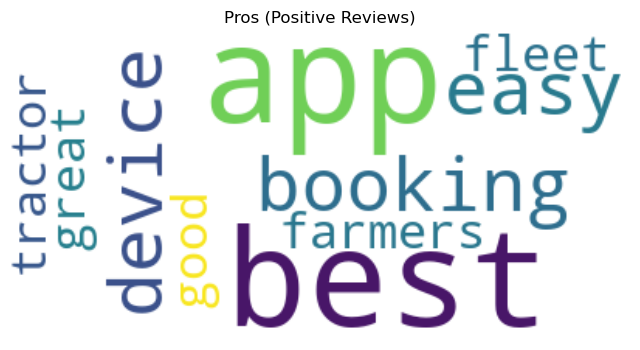

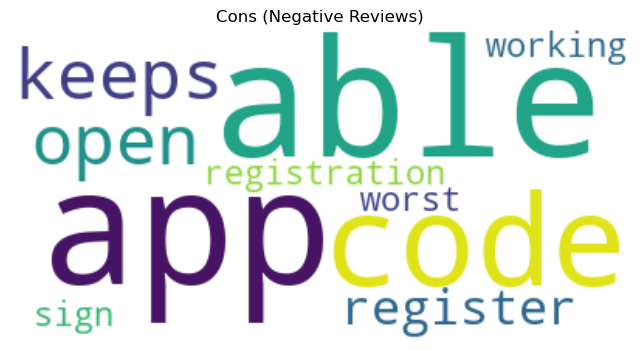

In [93]:
##Visualizing the frequent terms
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds
def generate_wordcloud(terms, title):
    wordcloud = WordCloud(background_color="white").generate(" ".join(terms))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

# Create word clouds for pros and cons
generate_wordcloud(positive_terms, "Pros (Positive Reviews)")
generate_wordcloud(negative_terms, "Cons (Negative Reviews)")

The above word cloud shows that pros words **best, app, and device** appears the most frequent in the reviews which suggests better app usability. While the cons words **able, code, and app** appears the most frequent suggesting technical problems with the app

In [95]:
## Extracting context for terms to understand pros and cons

# Extract reviews mentioning 'registration' (as an example)
problematic_reviews = negative_reviews[
    negative_reviews['content_new'].str.contains("registration", case=False)
]
print(problematic_reviews['content_new'].head())


45    It's asking registration.! Code What should I ...
52    Worst app, Even i can't able to registration o...
Name: content_new, dtype: object


This supports our ealier inference on registration issues with the hello tractor application